# Lab | Imbalanced data


### 1. Load the dataset and explore the variables.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [97]:
customers=pd.read_csv('customer_churn.csv')
customers.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [98]:
customers.Churn.value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [99]:
pd.set_option('display.max_columns', None) #to display all the columns 
customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [100]:
customers = customers.drop(['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges'], axis=1)
customers.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes


In [101]:
customers['Churn'] = np.where(customers['Churn']== 'Yes',1,0 ) 

### 3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [102]:
# X/y split
X = customers.drop('Churn',axis = 1)
y = customers['Churn']

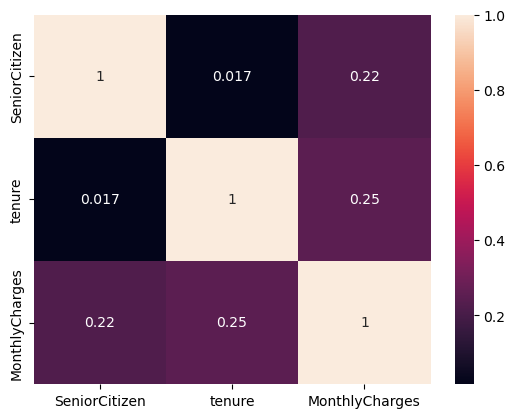

In [103]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [105]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges
0,-0.435476,-0.340191,-0.514314
1,2.296336,0.883210,0.017840
2,-0.435476,-1.196572,-0.819594
3,-0.435476,1.168670,-1.483535
4,-0.435476,-0.829552,0.658427


In [106]:
y_train.head()

3296    0
6397    0
6043    1
5309    0
3000    1
Name: Churn, dtype: int32

In [107]:
y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 


In [108]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int32

### 4. Build the logistic regression model.


In [109]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [110]:
LR.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [111]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1) 
logits

array([ 1.58958405,  2.08657509,  0.68826966, ...,  4.40639695,
       -1.05197978,  1.3631139 ])

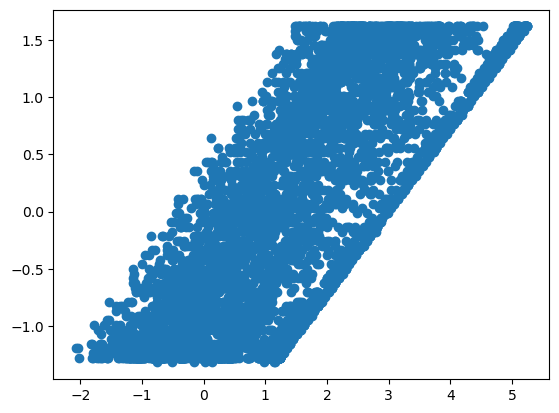

In [112]:
plt.scatter(logits,X_train_scaled['tenure'])

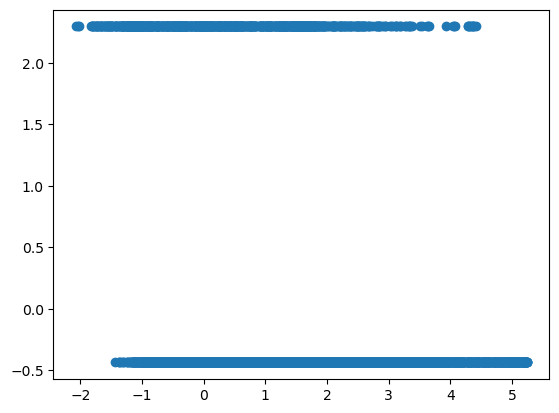

In [113]:
plt.scatter(logits,X_train_scaled['SeniorCitizen'])

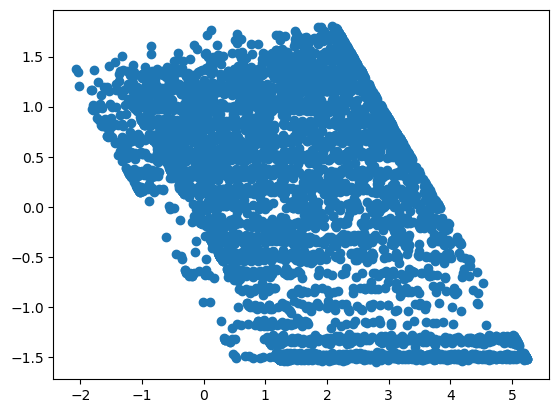

In [114]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])

<Axes: >

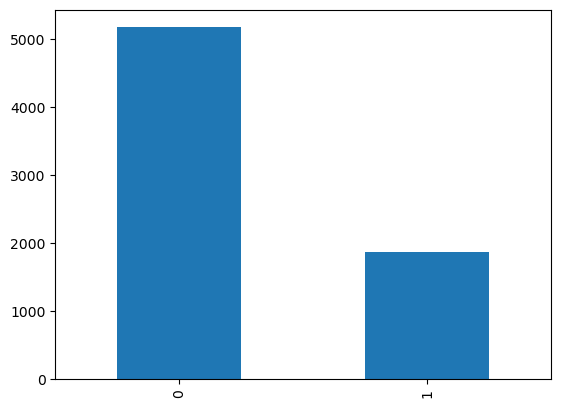

In [115]:
count_classes = customers['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [116]:
5100/(5100+1900)

0.7285714285714285

### 5. Evaluate the model


In [117]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [118]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



In [119]:
pred = LR.predict(X_test_scaled)

In [120]:
#recall_score-(Y_test, y_predict, average="binary", pos_label="Yes")

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred)) 
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]], dtype=int64)

### 6. Even a simple model will give us more than 70% accuracy. Why?


In [122]:
#6. Our model 78% accuracy because we have imbalanced data

In [123]:
#Oversampling

from sklearn.utils import resample

In [124]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,-0.435476,-0.340191,-0.514314,0
1,2.296336,0.883210,0.017840,0
2,-0.435476,-1.196572,-0.819594,1
3,-0.435476,1.168670,-1.483535,0
4,-0.435476,-0.829552,0.658427,1


In [125]:
no_churn = train[train['Churn']==0]
yes_churn = train[train['Churn']==1]

In [126]:
display(no_churn.shape)
display(yes_churn.shape)

(3876, 4)

(1406, 4)

In [127]:
# oversample minority
yes_churn_oversampled = resample(yes_churn, 
                                    replace=True, 
                                    n_samples = len(no_churn),
                                    random_state=0)

In [128]:
display(no_churn.shape)
display(yes_churn_oversampled.shape)
yes_churn_oversampled.head(20)

(3876, 4)

(3876, 4)

,SeniorCitizen,tenure,MonthlyCharges,Churn
2453,-0.435476,-1.278132,0.156300,1
1976,-0.435476,-1.278132,1.168894,1
4528,-0.435476,-1.196572,-0.319135,1
3011,-0.435476,-1.278132,0.488271,1
2758,-0.435476,-1.155792,-1.460181,1
5202,-0.435476,1.168670,-1.511895,1
3763,2.296336,-0.666432,-0.857962,1
1033,-0.435476,-1.074232,-0.294112,1
2135,-0.435476,-0.340191,1.043780,1
4006,-0.435476,-1.155792,0.301433,1


In [129]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,-0.435476,-0.340191,-0.514314,0
1,2.296336,0.883210,0.017840,0
3,-0.435476,1.168670,-1.483535,0
5,-0.435476,1.046330,0.503285,0
6,-0.435476,-0.258631,0.701800,0


In [130]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [131]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4790764790764791
recall:  0.7170626349892009
f1:  0.57439446366782


In [132]:
confusion_matrix(y_test,pred)

array([[937, 361],
       [131, 332]], dtype=int64)

In [133]:
#undersampling

In [134]:
no_churn_undersampled = resample(no_churn, 
                                    replace=False, 
                                    n_samples = len(yes_churn),
                                    random_state=0)

In [135]:
display(yes_churn.shape)
display(no_churn_undersampled.shape)

(1406, 4)

(1406, 4)

In [136]:
train_undersampled = pd.concat([yes_churn,no_churn_undersampled], axis=0)
train_undersampled.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
2,-0.435476,-1.196572,-0.819594,1
4,-0.435476,-0.829552,0.658427,1
12,-0.435476,-1.115012,0.630068,1
13,-0.435476,-1.237352,0.199673,1
15,-0.435476,-1.155792,0.698464,1


In [137]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [138]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.47701149425287354
recall:  0.7170626349892009
f1:  0.5729076790336497


In [139]:
confusion_matrix(y_test,pred)

array([[934, 364],
       [131, 332]], dtype=int64)

### 7. Synthetic Minority Oversampling TEchnique (SMOTE)

In [140]:
from imblearn.over_sampling import SMOTE

In [141]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [142]:
X_train_SMOTE.shape

(7752, 3)

In [143]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [144]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]], dtype=int64)